使用matlab和python编程实现（可以不使用工具提供的函数）图像的平移、镜像和旋转，以及这三种几何变换的复合

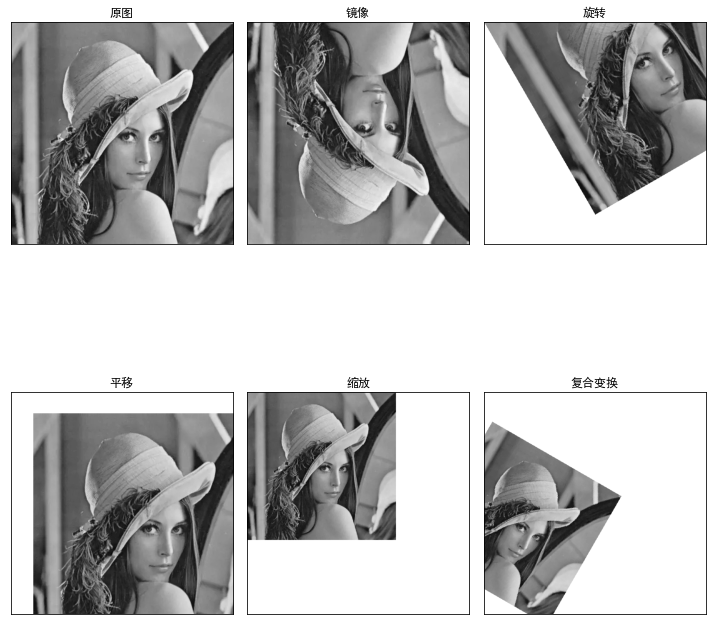

In [3]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
 
class Img:
    def __init__(self,image,rows,cols,center=[0,0]):
        self.src=image #原始图像
        self.rows=rows #原始图像的行
        self.cols=cols #原始图像的列
        self.center=center #旋转中心，默认是[0,0]
 
    # 定义不同的transform方式
    def Move(self,delta_x,delta_y):      #平移
        #delta_x>0左移，delta_x<0右移
        #delta_y>0上移，delta_y<0下移
        self.transform=np.array([[1,0,delta_x],[0,1,delta_y],[0,0,1]])
 
    def Zoom(self,factor):               #缩放
        #factor>1表示缩小；factor<1表示放大
        self.transform=np.array([[factor,0,0],[0,factor,0],[0,0,1]])
 
    def Horizontal(self):                #水平镜像
        self.transform=np.array([[1,0,0],[0,-1,self.cols-1],[0,0,1]])
 
    def Vertically(self):                #垂直镜像
        self.transform=np.array([[-1,0,self.rows-1],[0,1,0],[0,0,1]])
 
    def Rotate(self,beta):               #旋转
        #beta>0表示逆时针旋转；beta<0表示顺时针旋转
        self.transform=np.array([[math.cos(beta),-math.sin(beta),0],
                                 [math.sin(beta), math.cos(beta),0],
                                 [    0,              0,         1]])
    
    # 定义运算过程
    def Process(self):
        self.dst=np.zeros((self.rows,self.cols),dtype=np.uint8)
        for i in range(self.rows):
            for j in range(self.cols):
                src_pos=np.array([i-self.center[0],j-self.center[1],1])
                [x,y,z]=np.dot(self.transform,src_pos)
                x=int(x)+self.center[0]
                y=int(y)+self.center[1]
 
                if x>=self.rows or y>=self.cols or x<0 or y<0:
                    self.dst[i][j]=255
                else:
                    self.dst[i][j]=self.src[x][y]
 
if __name__=='__main__':
    src=cv2.imread('./lena.jpg',0)
    rows = src.shape[0]  # 行
    cols = src.shape[1]  # 列
   
    #原图
    img1=src
    
    #镜像
    img2=Img(src,rows,cols)
    img2.Vertically() 
    img2.Process()
    
    #旋转
    img3=Img(src,rows,cols)
    img3.Rotate(-math.radians(30)) 
    img3.Process()
    
    #平移
    img4=Img(src,rows,cols)
    img4.Move(-50,-50) 
    img4.Process()
    
    #缩放
    img5=Img(src,rows,cols)
    img5.Zoom(1.5) 
    img5.Process()
    
    # 复合变化 （注意 不能直接重复使用，而是每次要将修改后img进行保存）
    img6=Img(src,rows,cols)
    img6.Zoom(1.5) #缩小1.5倍
    img6.Process()
    src=img6.dst  # 对修改后的img进行保存
    img6=Img(src,rows,cols)
    img6.Move(-50,-50) # 平移
    img6.Process()
    src=img6.dst  # 对修改后的img进行保存
    img6=Img(src,rows,cols)
    img6.Rotate(-math.radians(-30)) # 顺时针旋转30度 
    img6.Process()
    

    plt.figure(figsize=(10, 12))
    
    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    plt.subplot(231), plt.imshow(img1, 'gray'), plt.xticks([]), plt.yticks([]), plt.title('原图')
    plt.subplot(232), plt.imshow(img2.dst, 'gray'), plt.xticks([]), plt.yticks([]), plt.title('镜像')
    plt.subplot(233), plt.imshow(img3.dst, 'gray'), plt.xticks([]), plt.yticks([]), plt.title('旋转')
    plt.subplot(234), plt.imshow(img4.dst, 'gray'), plt.xticks([]), plt.yticks([]), plt.title('平移')
    plt.subplot(235), plt.imshow(img5.dst, 'gray'), plt.xticks([]), plt.yticks([]), plt.title('缩放')
    plt.subplot(236), plt.imshow(img6.dst, 'gray'), plt.xticks([]), plt.yticks([]), plt.title('复合变换')
    plt.tight_layout()
    plt.show()